<span style="font-size:x-large;">**Market Basket Analysis Project**</span>

The retailer wants to target customers with suggestions on itemset that a customer is most likely to purchase ,for given dataset contains data of a retailer; the transaction data provides data around all the transactions that have happened over a period of time.

- File name: Assignment-1_Data
- List name: retaildata

This data set contains the following features:

- BillNo: 6-digit number assigned to each transaction. Nominal.
- Itemname: Product name. Nominal.
- Quantity: The quantities of each product per transaction. Numeric.
- Date: The day and time when each transaction was generated. Numeric.
- Price: Product price. Numeric.
- CustomerID: 5-digit number assigned to each customer. Nominal.
- Country: Name of the country where each customer resides. Nominal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
rt_data = pd.read_excel('Assignment-1_Data.xlsx')

In [4]:
rt_data.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Data contains null value so dropping them accordingly as per requirment

<span style="font-size:larger;">**DATA preparation and EDA**</span>

In [5]:
rt_data.isnull()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
522059,False,False,False,False,False,False,False
522060,False,False,False,False,False,False,False
522061,False,False,False,False,False,False,False
522062,False,False,False,False,False,False,False


In [6]:
rt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


Droping Null values for relavant features and comparing with previous Info

In [7]:
rt_data['Itemname'] = rt_data['Itemname'].str.strip()
rt_data.dropna(axis=0, subset=['BillNo'], inplace=True)
rt_data.dropna(axis=0, subset=['Itemname'], inplace=True)
rt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520609 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      520609 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    520609 non-null  int64         
 3   Date        520609 non-null  datetime64[ns]
 4   Price       520609 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     520609 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 31.8+ MB


In [8]:
rt_data.describe()

,Quantity,Price,CustomerID
count,520609.000000,520609.000000,388023.000000
mean,10.145545,3.837497,15316.931710
std,160.818639,41.958621,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


In [9]:
rt_data['Country'].value_counts()

United Kingdom          486167
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

**Separation** for Country France - TRANSACTION

In [10]:
fr_basket = (rt_data[rt_data['Country']=='France'].groupby(['BillNo','Itemname'])['Quantity']
             .sum().unstack().reset_index().fillna(0).set_index('BillNo'))

In [11]:
fr_basket.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def encode_units(x):
    if x<=0:
        return 0
    if x >=1:
        return 1
fr_basket_sets = fr_basket.applymap(encode_units)

In [13]:
#droping insignificant item
fr_basket_sets.drop('POSTAGE',inplace=True,axis=1)

In [14]:
fr_basket_sets.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Itemname', ylabel='Itemname'>

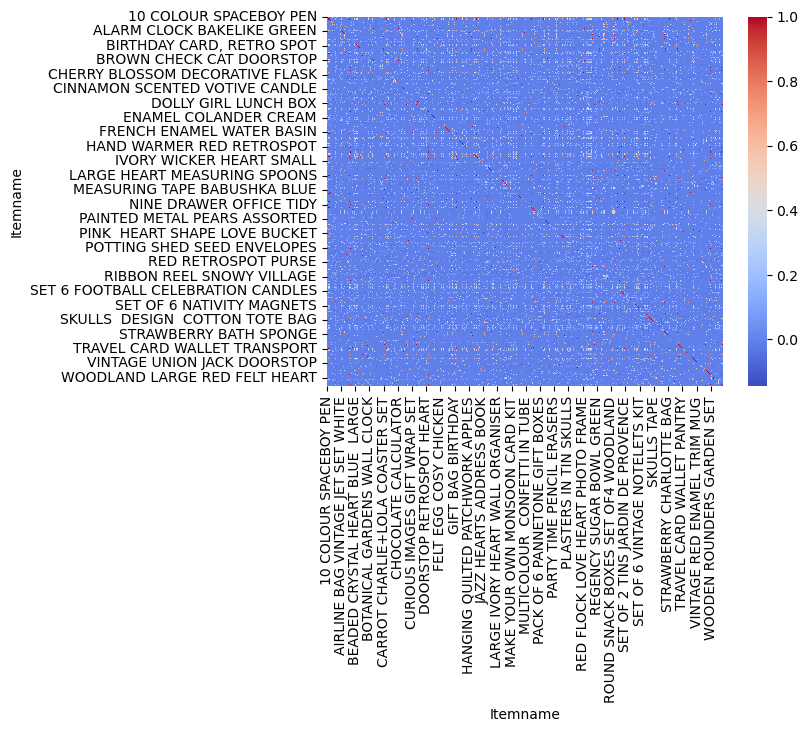

In [15]:
sns.heatmap(fr_basket_sets.corr(),cmap='coolwarm')

Heatmap couln't able to analyze properly, So have to implement after association

**TRANING MODEL**

For market basket analysis

In [16]:
#Generating Frequent Items
fr_items = apriori(fr_basket_sets, min_support=0.07, use_colnames= True)
fr_items.head()

C:\Users\abhis\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)


In [17]:
#generating rules
fr_rules = association_rules(fr_items, metric= 'lift', min_threshold=1)
fr_rules.head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466
6,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.125000,0.099490,0.071429,0.571429,5.743590,0.058992,2.101190,0.943878
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273,0.917139


**Showing Apriori Growth**

In [43]:
import networkx as nx

In [44]:
G = nx.DiGraph()

In [45]:
for i, rule in fr_rules.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['support'])

In [46]:
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

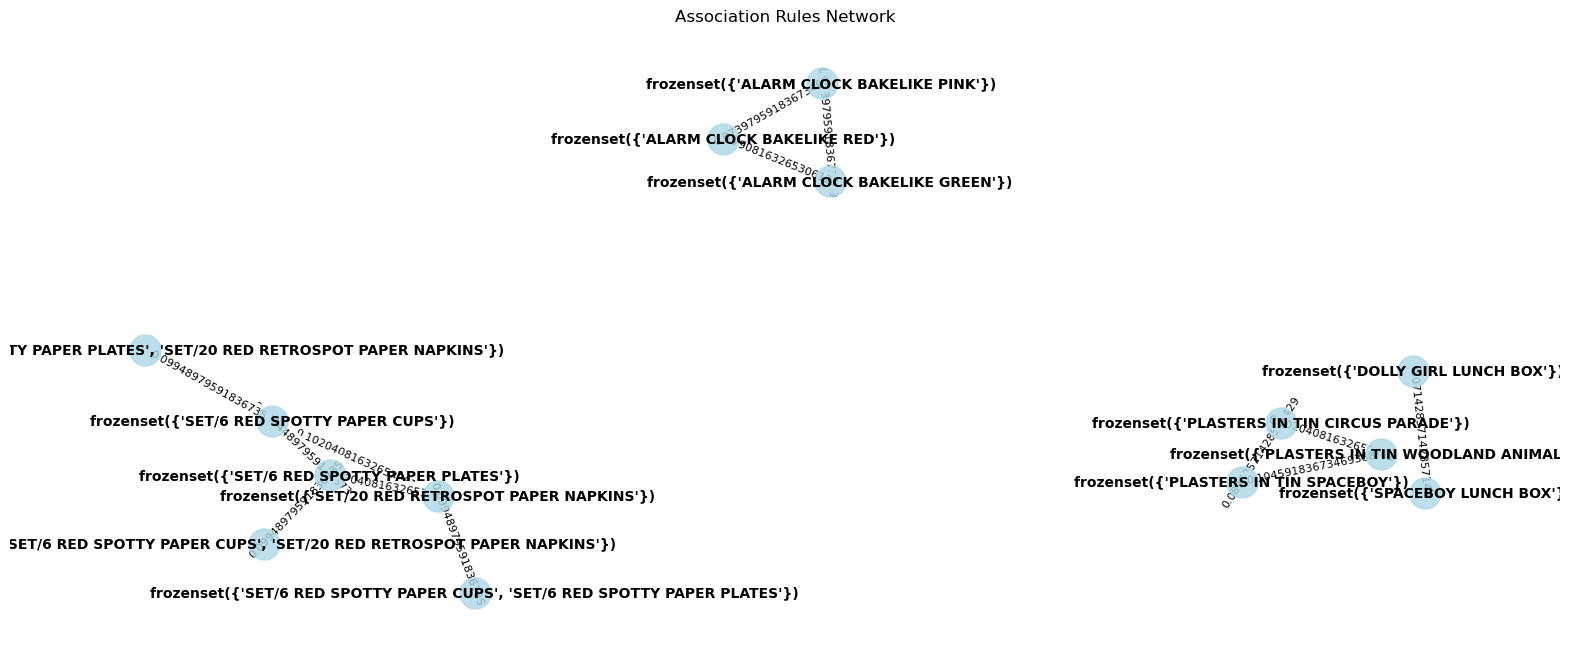

In [47]:
plt.figure(figsize=(20, 8))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.8, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title('Association Rules Network')
plt.axis('off')
plt.show()

In [33]:
rules = fr_rules[(fr_rules['lift']>=7.5) & (fr_rules['confidence']>=0.8)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
21,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959,0.967949


In [34]:
for j, rule in rules.iterrows():
    G.add_edge(rule['antecedents'], rule['consequents'], weight=rule['support'])

In [35]:
pos1 = nx.spring_layout(G)
edge_labels1 = nx.get_edge_attributes(G, 'weight')

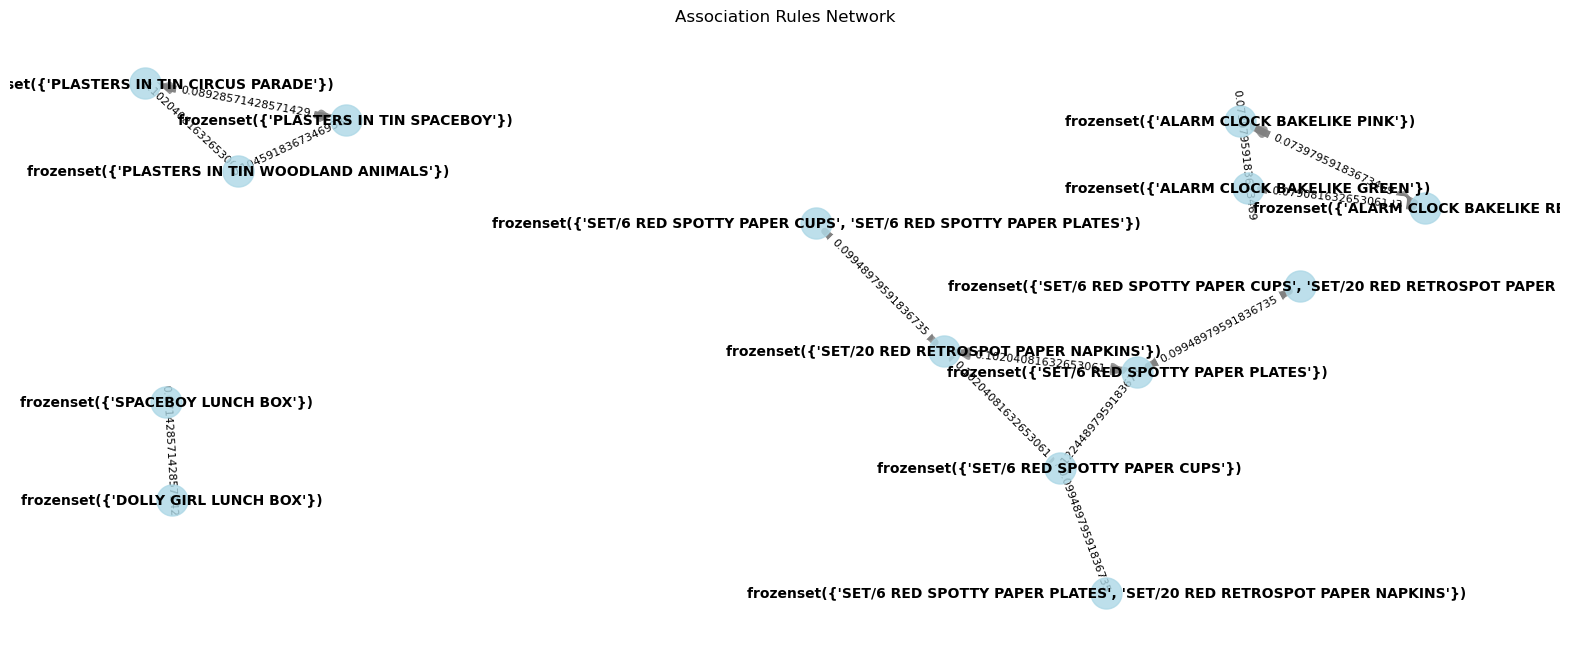

In [36]:
plt.figure(figsize=(20,8))
nx.draw_networkx_nodes(G, pos1, node_size=500, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos1, edge_color='gray', width=5, alpha=0.8, arrows=True)
nx.draw_networkx_labels(G, pos1, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos1, edge_labels=edge_labels1, font_size=8)
plt.title('Association Rules Network')
plt.axis('off')
plt.show()

For different set of rules find diffrent apriori